# Optional Lab: Linear Regression using Scikit-Learn

There is an open-source, commercially usable machine learning toolkit called [scikit-learn](https://scikit-learn.org/stable/index.html). This toolkit contains implementations of many of the algorithms that you will work with in this course.



## Goals
In this lab you will:
- Utilize  scikit-learn to implement linear regression using Gradient Descent##目标

在这个实验室里，你将：

-利用scikit学习使用梯度下降实现线性回归

## Tools
You will utilize functions from scikit-learn as well as matplotlib and NumPy. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

# Gradient Descent
Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like your previous implementation of gradient descent, this model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.

### Load the data set

In [8]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']
print(X_train)
print(y_train)

[[1.24e+03 3.00e+00 1.00e+00 6.40e+01]
 [1.95e+03 3.00e+00 2.00e+00 1.70e+01]
 [1.72e+03 3.00e+00 2.00e+00 4.20e+01]
 [1.96e+03 3.00e+00 2.00e+00 1.50e+01]
 [1.31e+03 2.00e+00 1.00e+00 1.40e+01]
 [8.64e+02 2.00e+00 1.00e+00 6.60e+01]
 [1.84e+03 3.00e+00 1.00e+00 1.70e+01]
 [1.03e+03 3.00e+00 1.00e+00 4.30e+01]
 [3.19e+03 4.00e+00 2.00e+00 8.70e+01]
 [7.88e+02 2.00e+00 1.00e+00 8.00e+01]
 [1.20e+03 2.00e+00 2.00e+00 1.70e+01]
 [1.56e+03 2.00e+00 1.00e+00 1.80e+01]
 [1.43e+03 3.00e+00 1.00e+00 2.00e+01]
 [1.22e+03 2.00e+00 1.00e+00 1.50e+01]
 [1.09e+03 2.00e+00 1.00e+00 6.40e+01]
 [8.48e+02 1.00e+00 1.00e+00 1.70e+01]
 [1.68e+03 3.00e+00 2.00e+00 2.30e+01]
 [1.77e+03 3.00e+00 2.00e+00 1.80e+01]
 [1.04e+03 3.00e+00 1.00e+00 4.40e+01]
 [1.65e+03 2.00e+00 1.00e+00 2.10e+01]
 [1.09e+03 2.00e+00 1.00e+00 3.50e+01]
 [1.32e+03 3.00e+00 1.00e+00 1.40e+01]
 [1.59e+03 0.00e+00 1.00e+00 2.00e+01]
 [9.72e+02 2.00e+00 1.00e+00 7.30e+01]
 [1.10e+03 3.00e+00 1.00e+00 3.70e+01]
 [1.00e+03 2.00e+00 1.00e

### Scale/normalize the training data

In [3]:
scaler = StandardScaler()   #使用了StandardScaler()标准化器来对X_train进行特征缩放，并将结果赋值给X_norm
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   #即返回每列的最大值和最小值之差
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


### Create and fit the regression model创建并拟合回归模型

In [4]:
#使用了SGDRegressor（随机梯度下降回归器）来拟合经过特征缩放后的训练数据X_norm和对应的目标值y_train。设置最大迭代次数为1000
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
#n_iter_表示在拟合过程中实际完成的迭代次数，t_表示权重更新的次数

SGDRegressor()
number of iterations completed: 113, number of weight updates: 11188.0


### View parameters
Note, the parameters are associated with the *normalized* input data. The fit parameters are very close to those found in the previous lab with this data.###查看参数

注意，这些参数与*归一化*输入数据相关联。拟合参数与之前使用该数据的实验室中发现的参数非常接近。

In [5]:
b_norm = sgdr.intercept_#使用intercept_属性获取拟合后模型的截距参数
w_norm = sgdr.coef_#使用coef_属性获取拟合后模型的权重参数（系数）
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [109.94 -20.97 -32.37 -38.05], b:[363.17]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


### Make predictions
Predict the targets of the training data. Use both the `predict` routine and compute using $w$ and $b$.
###做出预测

预测训练数据的目标。同时使用“预测”例程和使用$w$和$b$进行计算。

In [6]:
#使用sgdr.product（）进行预测
y_pred_sgd = sgdr.predict(X_norm)
#使用w，b进行预测。
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.23 485.81 389.61 491.97]
Target values 
[300.  509.8 394.  540. ]


### Plot Results
Let's plot the predictions versus the target values.

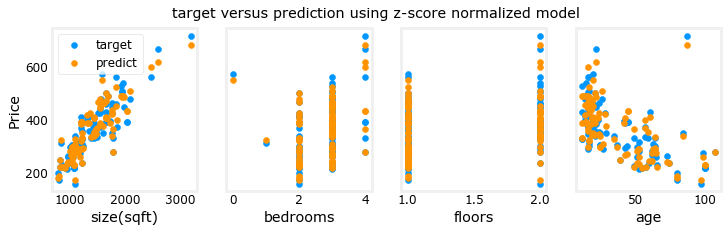

In [7]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

## Congratulations!
In this lab you:
- utilized an open-source machine learning toolkit, scikit-learn
- implemented linear regression using gradient descent and feature normalization from that toolkit